# **Algoritma K-Means Clustering**

## **Pengertian K-Means Clustering**

K-Means Clustering adalah algoritma dalam unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa klaster (kelompok) berdasarkan kemiripan fitur. Setiap klaster memiliki satu centroid (titik pusat), dan data akan dimasukkan ke klaster yang memiliki centroid paling dekat dengannya.

## **Manfaat Clustering**


1. Mengelompokkan Data Secara Otomatis

  K-Means membantu mengelompokkan data yang besar dan kompleks ke dalam beberapa kelompok (cluster) berdasarkan kemiripan. Ini berguna untuk menemukan pola tersembunyi tanpa label data.

2. Menyederhanakan Analisis Data

  Dengan mengelompokkan data ke dalam cluster yang serupa, analis atau pengguna bisa lebih mudah memahami struktur data dan membuat keputusan berbasis kelompok.

3. Efisien dan Cepat

  K-Means tergolong algoritma yang ringan dan cepat karena perhitungannya relatif sederhana, terutama dibandingkan metode clustering lain seperti hierarchical clustering.

4. Aplikasi Luas

  K-Means digunakan dalam berbagai bidang, antara lain:

  - Segmentasi pelanggan dalam pemasaran (misalnya, mengelompokkan konsumen berdasarkan kebiasaan belanja).

  - Pengelompokan dokumen atau teks berdasarkan kemiripan kata (dalam NLP).

  - Analisis citra, seperti segmentasi warna dalam gambar.

  - Deteksi anomali, dengan melihat data yang tidak termasuk ke dalam cluster manapun dengan baik.

5. Dapat Digunakan Sebagai Pra-Pemrosesan

  K-Means sering digunakan untuk mengurangi dimensi data atau sebagai tahap awal sebelum menggunakan algoritma lain, misalnya sebelum klasifikasi.



## **Langkah - Langkah Algoritma K-Means Clustering**

1. Tentukan jumlah cluster
𝑘
.

2. Inisialisasi
𝑘
 centroid secara acak.

3. Hitung jarak setiap data ke masing-masing centroid.

4. Kelompokkan data ke centroid terdekat.

5. Hitung ulang centroid berdasarkan rata-rata data di tiap cluster.

6. Ulangi langkah 3–5 sampai centroid tidak berubah atau konvergen.

## **Inertia (Sum Square error/SSE)**


Inertia (atau Sum of Squared Error – SSE) adalah ukuran total jarak kuadrat antara masing-masing data point ke pusat (centroid) clusternya. Ini menggambarkan tingkat penyebaran data dalam cluster: semakin kecil nilainya, semakin baik data dikumpulkan di sekeliling centroidnya.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**


Silhouette Analysis adalah teknik untuk menilai kualitas hasil clustering dengan cara mengukur seberapa baik setiap titik data berada dalam cluster yang tepat dan seberapa terpisahnya cluster satu dengan lainnya. Dalam konteks clustering seperti K-Means, Silhouette Analysis memberikan wawasan tentang apakah jumlah cluster yang dipilih sudah optimal dan apakah data tersebut dikelompokkan dengan benar.


$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## **Implementasi dengan menggunakan data Iris**

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.8 MB/s eta 0:00:00


## **Library yang digunakan**

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Pengumpulan Data**

Kode dibawah ini mengambil data dari dua database berbeda, yaitu PostgreSQL dan MySQL, lalu menggabungkannya berdasarkan kolom id dan class. Data dari masing-masing tabel (bilqiz.postgres dan flowers) diambil dan diubah menjadi DataFrame menggunakan pandas. Setelah itu, kedua data digabung dengan metode inner join, sehingga hanya data yang cocok di kedua tabel yang ditampilkan. Hasil akhirnya dicetak ke layar tanpa menampilkan indeks baris.


In [3]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-a44046a-postgresqlpendata.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_OpeN9KvVOC1fGGGCEG-",
        database="defaultdb",
        port=21346
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bilqiz.postgres")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-c5ffcaf-mysqlpendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_84u5GTktRvy0MOoNzQD",
        database="bilqizah",
        port=20432
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          14.0          2.0          51.0         35.0
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa          13.0          2.0          47.0         32.0
  4     Iris-setosa          15.0          2.0          46.0         31.0
  5     Iris-setosa          14.0          2.0          50.0         36.0
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## **Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4**

In [4]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[-0.23605317 -0.20311735 -0.25895366 -0.25625601]
 [ 3.30474438  2.84364286  3.62535119  3.58758416]]
Akurasi (Adjusted Rand Score): 0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-0.32734147 -0.33063009 -0.2892274  -0.2629765 ]
 [ 3.30474438  2.84364286  3.62535119  3.58758416]
 [ 2.22873101  3.23972683  0.55843734 -0.07480289]]
Akurasi (Adjusted Rand Score): 0.002

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-0.32734147 -0.33063009 -0.2892274  -0.2629765 ]
 [ 3.28610674  2.8796505   4.0965482   4.35738526]
 [ 2.22873101  3.23972683  0.55843734 -0.07480289]
 [ 3.32338203  2.80763523  3.15415419  2.81778306]]
Akurasi (Adjusted Rand Score): 0.005


## **Model Plotting dengan Jumlah Cluster 2, 3 dan 4**

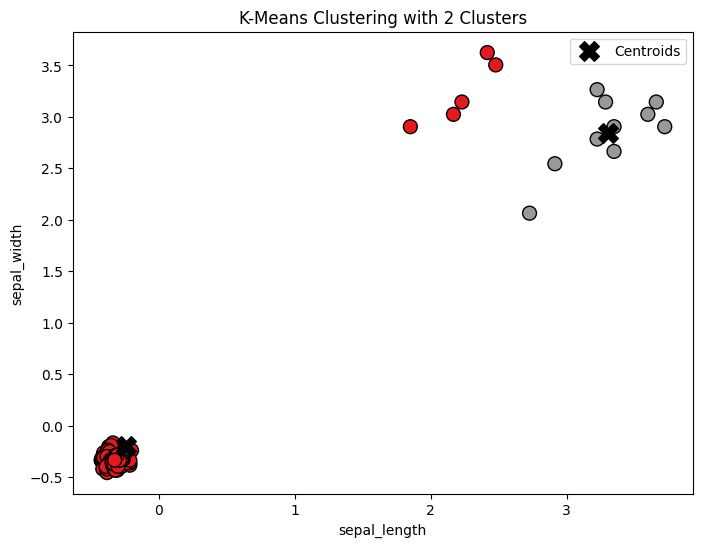

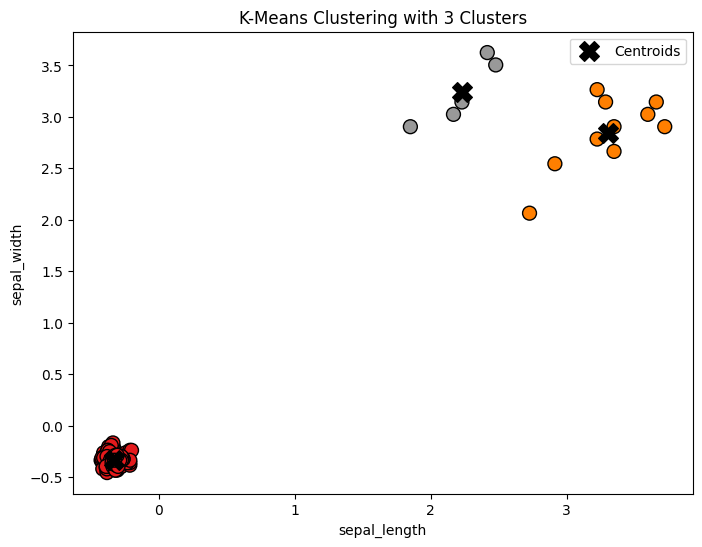

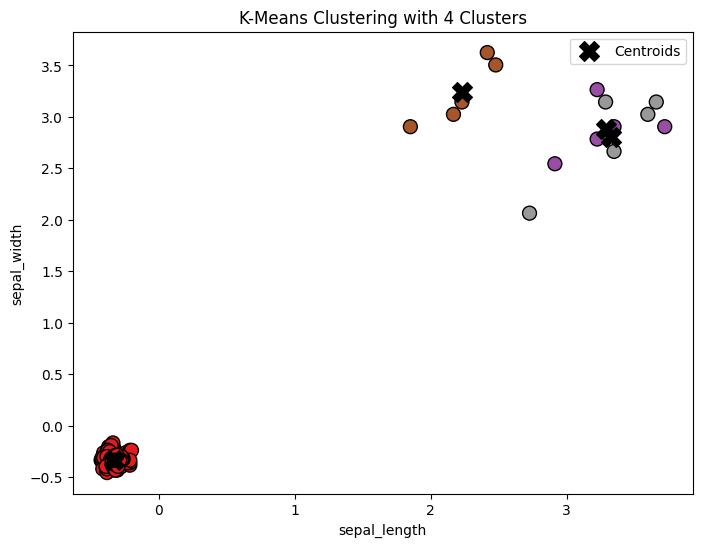

In [5]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


## **Menghitung Inertia untuk Jumlah Cluster 2,3 dan 4**

In [6]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[-0.23605317 -0.20311735 -0.25895366 -0.25625601]
 [ 3.30474438  2.84364286  3.62535119  3.58758416]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [ 2.47847545  3.50378281  0.55843734 -0.07480289]), Klaster: 0, Centroid: [-0.23605317 -0.20311735 -0.25895366 -0.25625601], Jarak kuadrat: 21.811, Inertia sementara: 21.811
Titik data 2 (Fitur: [ 1.85100807  2.90365558  0.55843734 -0.07480289]), Klaster: 0, Centroid: [-0.23605317 -0.20311735 -0.25895366 -0.25625601], Jarak kuadrat: 14.709, Inertia sementara: 36.520
Titik data 3 (Fitur: [ 2.22997352  3.14370648  0.4757712  -0.07480289]), Klaster: 0, Centroid: [-0.23605317 -0.20311735 -0.25895366 -0.25625601], Jarak kuadrat: 17.855, Inertia sementara: 54.375
Titik data 4 (Fitur: [ 2.16784804  3.02368103  0.64110348 -0.07480289]), Klaster: 0, Centroid: [-0.23605317 -0.20311735 -0.25895366 -0.25625601], Jarak kuadrat: 17.034, Inertia sementara: 71.409
Ti

## **Model Plotting Diagram Elbow Method**

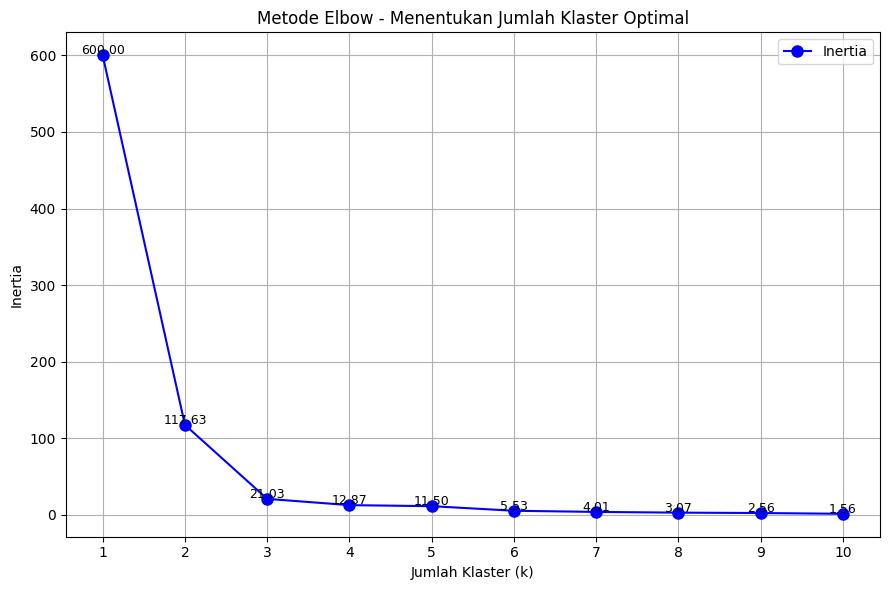

In [7]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

## **Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[-0.23605317 -0.20311735 -0.25895366 -0.25625601]
 [ 3.30474438  2.84364286  3.62535119  3.58758416]]
Silhouette Score untuk 2 klaster: 0.903

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[-0.32734147 -0.33063009 -0.2892274  -0.2629765 ]
 [ 3.30474438  2.84364286  3.62535119  3.58758416]
 [ 2.22873101  3.23972683  0.55843734 -0.07480289]]
Silhouette Score untuk 3 klaster: 0.918

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[-0.32734147 -0.33063009 -0.2892274  -0.2629765 ]
 [ 3.28610674  2.8796505   4.0965482   4.35738526]
 [ 2.22873101  3.23972683  0.55843734 -0.07480289]
 [ 3.32338203  2.80763523  3.15415419  2.81778306]]
Silhouette Score untuk 4 klaster: 0.904

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 3 (dengan score = 0.918)


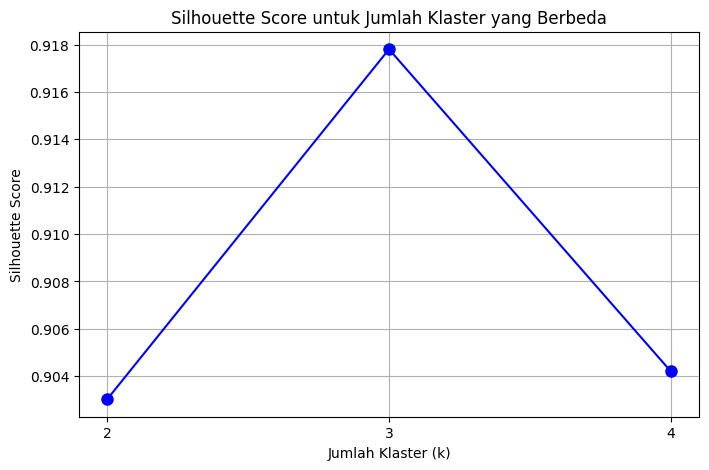

In [8]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()